In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/인사교/DL

/content/drive/MyDrive/인사교/DL


### 목표 : 자동차 파손에 대한 감지
- Detection으로만 수행(단순한 객체 탐지)보다는 Segmentation이 픽셀 수준에서 객체 경계나 영역을 더 세밀하게 탐지

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 19.1 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

In [7]:
# 세그먼트 맛보기

# 모델 불러오기
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 93.5MB/s]


In [8]:
# 예측수행
result = model.predict('https://ultralytics.com/images/bus.jpg', save = True, conf = 0.15)

100%|██████████| 134k/134k [00:00<00:00, 9.06MB/s]


image 1/1 /content/drive/MyDrive/인사교/DL/bus.jpg: 640x480 4 persons, 1 bus, 1 umbrella, 1 skateboard, 47.8ms
Speed: 12.6ms preprocess, 47.8ms inference, 792.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict


In [10]:
# 탐지한 객체 정보 확인
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0.,  0.,  5.,  0., 36., 25.], device='cuda:0')
conf: tensor([0.8778, 0.8602, 0.8412, 0.8382, 0.4119, 0.3920, 0.1996], device='cuda:0')
data: tensor([[6.7023e+02, 3.8868e+02, 8.0951e+02, 8.7714e+02, 8.7779e-01, 0.0000e+00],
        [4.8478e+01, 3.9623e+02, 2.4237e+02, 9.0443e+02, 8.6022e-01, 0.0000e+00],
        [2.2250e+02, 4.0784e+02, 3.4416e+02, 8.6190e+02, 8.4123e-01, 0.0000e+00],
        [2.8835e+00, 2.2795e+02, 8.0049e+02, 7.2202e+02, 8.3817e-01, 5.0000e+00],
        [0.0000e+00, 5.5165e+02, 7.7754e+01, 8.7552e+02, 4.1194e-01, 0.0000e+00],
        [6.6899e+02, 8.2287e+02, 8.1000e+02, 8.8216e+02, 3.9195e-01, 3.6000e+01],
        [3.0801e-01, 2.5171e+02, 3.3463e+01, 3.2589e+02, 1.9960e-01, 2.5000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([7, 6])
xywh: tensor([[739.8715, 632.9112, 139.2816, 488.4546],
        [145.4260, 650.3315, 193.8962, 508.2000],
        [

<function matplotlib.pyplot.show(close=None, block=None)>

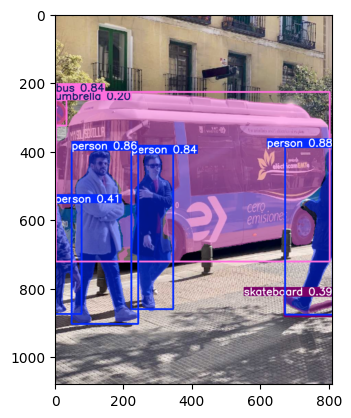

In [12]:
import matplotlib.pyplot as plt
import cv2

img = cv2.cvtColor(result[0].plot(), cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show

### Segmentation(세분화)와 Object Detection(객체 탐지)
- Segmentation이 보다 더 정밀한 기술 -> 픽셀단위로 객체의 경계를 추적함

> Object Detection : 대략적인 객체의 위치나 클래스만을 식별 <br>
Segmentation : 바운딩 박스뿐만 아니라, 객체의 모양까지 정확히 표현 (객체의 영역을 세밀하게 인식)

- ex. 자동차 고장 영역만의 윤곽이나, 사람 눈(코, 입 등)의 실루엣을 픽셀 단위로 추적해서 복잡한 장면에서도 객체의 모양을 정확히 인식할 수 있음

In [13]:
# 차량 파손 데이터 다운
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Tul3aQKb1W7lRRPJdcyc")
project = rf.workspace("none-n1imd").project("car-jxbzt")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.91, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to car-1 in yolov8:: 100%|██████████| 671/671 [00:05<00:00, 118.22it/s]
